### Статистический анализ данных 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [11]:
import json 
import os
os.chdir("C:/api")
data = {"username":"username","key":"tockenvalue"}
with open('kaggle.json', 'w') as outfile:
    json.dump(data, outfile)


In [12]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi('kaggle.json')
api.authenticate()

In [13]:
api.competition_download_files("titanic", path=r"C:\Users\User\notebooks\titanic")

In [14]:
import zipfile

In [15]:
zip_file_path = "C:\\Users\\User\\notebooks\\titanic"
extract_folder = "C:\\Users\\User\\notebooks\\titanic\\datasets"

if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\User\\notebooks\\titanic'

# 1. Упражнения на работу с pandas:

## Загрузка данных и первичный обзор
1. Загрузите данные о Титанике с помощью pandas.
2. Отобразите первые 5 строк с помощью `head()`.
3. Узнайте, сколько строк и столбцов в данных с помощью `shape`.
4. Просмотрите статистическое описание числовых столбцов с помощью `describe()`.

In [16]:
titanic_data = pd.read_csv(extract_folder + "\\train.csv")

In [12]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Матричные операции
- Создайте двумерный массив, где строки будут представлять различные признаки пассажиров, а столбцы — их значения. Например, можно создать массив для возрастов, цен билетов и т.д.
- Рассчитайте корреляцию между возрастом и стоимостью билета с использованием метода `corrcoef()`.

1. PassengerId – Уникальный идентификатор для каждого пассажира.
2. Pclass – Класс билета, с которым путешествовал пассажир. Значения могут быть 1 (первый класс), 2 (второй класс) или 3 (третий класс).
3. Name – Имя пассажира.
4. Sex – Пол пассажира (male, female).
5. Age – Возраст пассажира в годах. Для некоторых пассажиров могут быть пропуски (NaN).
6. SibSp – Количество братьев/сестер/супругов, путешествующих с пассажиром на борту.
7. Parch – Количество родителей/детей, путешествующих с пассажиром на борту.
8. Ticket – Номер билета.
9. Fare – Стоимость билета, оплаченная пассажиром.
10. Cabin – Номер каюты, в которой находился пассажир. Часто пропущены данные в этом столбце.
11. Embarked – Порт, в котором пассажир садился на корабль. Возможные значения:
 * 'C' – Cherbourg
 * 'Q' – Queenstown
 * 'S' – Southampton
12. Survived – Статус выживания пассажира. 1 означает, что пассажир выжил, а 0 — не выжил.

In [14]:
titanic_data.shape

(891, 12)

In [15]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Обработка пропусков
- Найдите все пропуски в данных с помощью `isnull()` и подсчитайте их количество для каждого столбца.
- Заполните пропуски в столбце `Age` средним значением возраста.
- Заполните пропуски в столбце `Embarked` самым популярным портом посадки (с использованием `mode()`).

In [31]:
titanic_data.loc[:].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [158]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_data['Cabin'].fillna('Unknown', inplace=True)

In [38]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S


## Фильтрация данных
- Отфильтруйте пассажиров, которые выжили (`Survived == 1`).
- Найдите средний возраст для выживших и невыживших пассажиров.
- Отфильтруйте пассажиров, которые путешествовали в первом классе и выжили.

In [76]:
survived_passengers = titanic_data[titanic_data['Survived'] == 1]
survived_passengers.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [77]:
print(f"Количество выживших пассажиров: {survived_passengers.shape[0]}")

Количество выживших пассажиров: 342


In [78]:
mid_age_died = titanic_data.Age.mean()
mid_age_surv = titanic_data[titanic_data['Survived'] == 0].Age.mean()
print(f"Средний возраст выживших пассажиров: {mid_age_surv}\n"
      f"Средний возраст невыживших пассажиров: {mid_age_died}")

Средний возраст выживших пассажиров: 30.415099646415943
Средний возраст невыживших пассажиров: 29.69911764705882


In [69]:
survive_passenger_first_class = survived_passengers[survived_passengers['Pclass'] == 1]
survive_passenger_first_class.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [79]:
print(f"Количество выживших пассажиров 1-го класса: {survive_passenger_first_class.shape[0]}")

Количество выживших пассажиров 1-го класса: 136



## Группировка и агрегация
- Рассчитайте средний возраст по каждому классу (`Pclass`).
- Найдите количество выживших пассажиров по каждому классу.
- Определите среднюю стоимость билета (`Fare`) для каждого пола.

In [84]:
titanic_data.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [88]:
titanic_data[titanic_data['Survived'] == 1].groupby('Pclass')['Survived'].count()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [89]:
titanic_data.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

## 2. Упражнения на работу с numpy:

### Основы numpy
- Создайте массив numpy, представляющий возраст пассажиров.
- Найдите средний возраст всех пассажиров с помощью numpy.
- Используя numpy, создайте логический массив, который покажет, какие пассажиры выжили (`Survived == 1`).


In [94]:
age_array = titanic_data['Age'].to_numpy()
age_array

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [95]:
age_array.mean()

29.69911764705882

In [97]:
survived_age = titanic_data['Survived'].to_numpy()
survived_age

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [98]:
survived_age.astype(bool)

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,


### Использование статистических функций
- Рассчитайте медиану, стандартное отклонение и дисперсию для возраста пассажиров с использованием numpy.
- Используя numpy, найдите минимальную и максимальную стоимость билета среди пассажиров.


In [102]:
age_array = titanic_data['Age'].to_numpy()
print(f"Медиана: {age_array.mean()}\n"
      f"Стандартное отклонение: {age_array.std()}\n"
      f"Дисперсия: {age_array.var()}")

Медиана: 29.69911764705882
Стандартное отклонение: 12.99471687278903
Дисперсия: 168.86266660394793


In [104]:
fare_array = titanic_data['Fare'].to_numpy()
print(f"Максимальная стоимость билета: {fare_array.max()}\n"
      f"Минимальная стоимость билета: {fare_array.min()}")

Максимальная стоимость билета: 512.3292
Минимальная стоимость билета: 0.0


In [106]:
smth_array = titanic_data.to_numpy()
print(smth_array)

[[1 0 3 ... 7.25 nan 'S']
 [2 1 1 ... 71.2833 'C85' 'C']
 [3 1 3 ... 7.925 nan 'S']
 ...
 [889 0 3 ... 23.45 nan 'S']
 [890 1 1 ... 30.0 'C148' 'C']
 [891 0 3 ... 7.75 nan 'Q']]


In [108]:
age_array

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [109]:
fare_array

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,
        61.9792,  35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
         7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
        10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,
        73.5   ,  14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        10.5   ,  15.85  ,  34.375 ,   8.05  , 263.    ,   8.0

In [107]:
corr_age_fare = np.corrcoef(age_array, fare_array)
print(corr_age_fare)

[[1.         0.09156609]
 [0.09156609 1.        ]]


Коэффициент корреляции - 0.09156609 - зависимость слабая

# 3. Упражнения на matplotlib и seaborn (визуализация):

## Основы визуализации
* Постройте гистограмму распределения возраста пассажиров (с помощью `plt.hist()`).
* Постройте коробчатую диаграмму для столбца `Age`, чтобы показать распределение возрастов с помощью `sns.boxplot()`.


(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

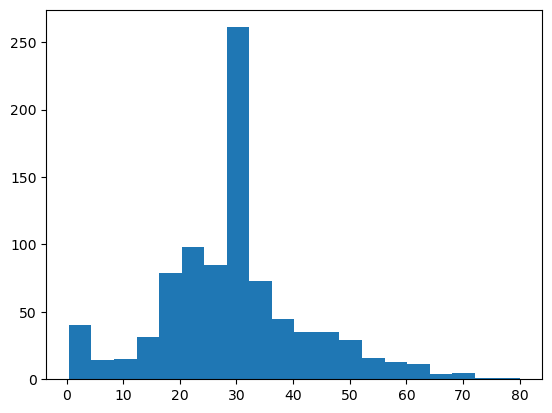

In [122]:
fig, ax = plt.subplots()
ax.hist(titanic_data['Age'], bins=20)


<Axes: >

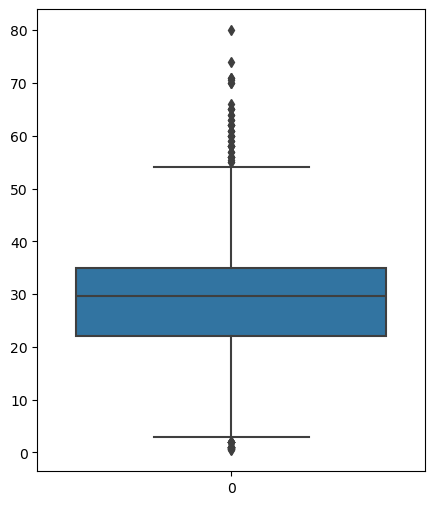

In [125]:
plt.figure(figsize=(5, 6))
sns.boxplot(titanic_data['Age'])

## Сравнение выживших и невыживших
- Постройте бар-чарт, показывающий количество выживших и невыживших пассажиров.
- Постройте гистограмму для возраста выживших и невыживших пассажиров.


<Axes: xlabel='Survived', ylabel='count'>

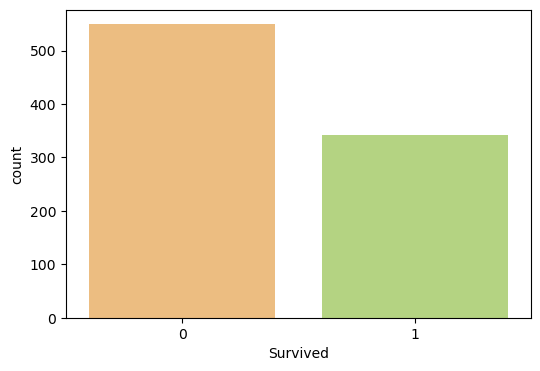

In [135]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data, palette='RdYlGn')

Text(0.5, 1.0, 'Гистограмма возраста невыживших пассажиров')

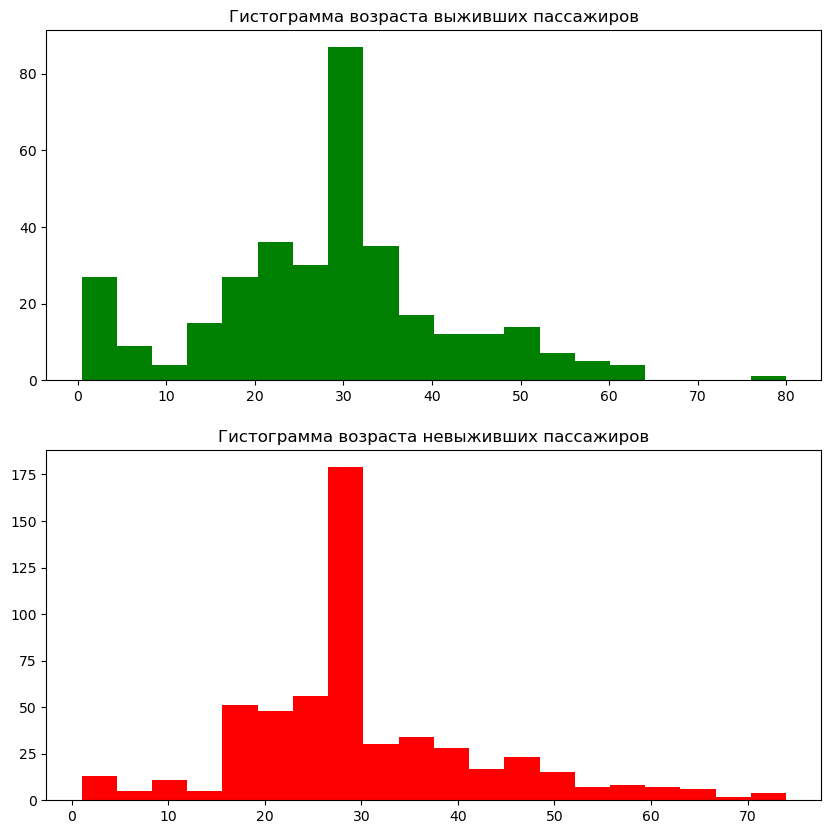

In [133]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].hist(x=titanic_data[titanic_data['Survived'] == 1]['Age'].dropna(), bins=20, color='green')
ax[0].set_title('Гистограмма возраста выживших пассажиров')

ax[1].hist(x=titanic_data[titanic_data['Survived'] == 0]['Age'].dropna(), bins=20, color='red')
ax[1].set_title('Гистограмма возраста невыживших пассажиров')

## Визуализация корреляций
- Постройте тепловую карту корреляции между числовыми признаками (например, `Age`, `Fare`, `SibSp`, `Parch`) с помощью `sns.heatmap()`.
- Используя `pairplot` (с помощью `sns.pairplot()`), визуализируйте взаимосвязь между различными числовыми признаками для всех пассажиров.

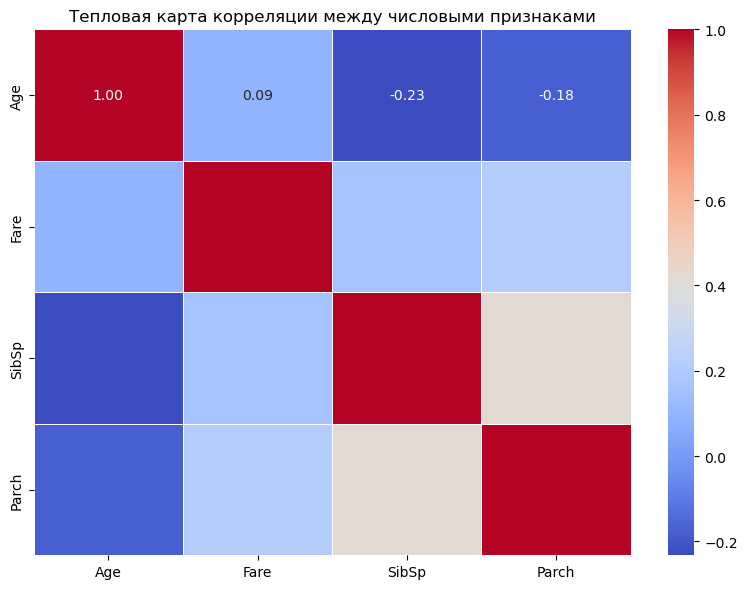

In [152]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

corr_matrix = titanic_data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)

plt.title('Тепловая карта корреляции между числовыми признаками')
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

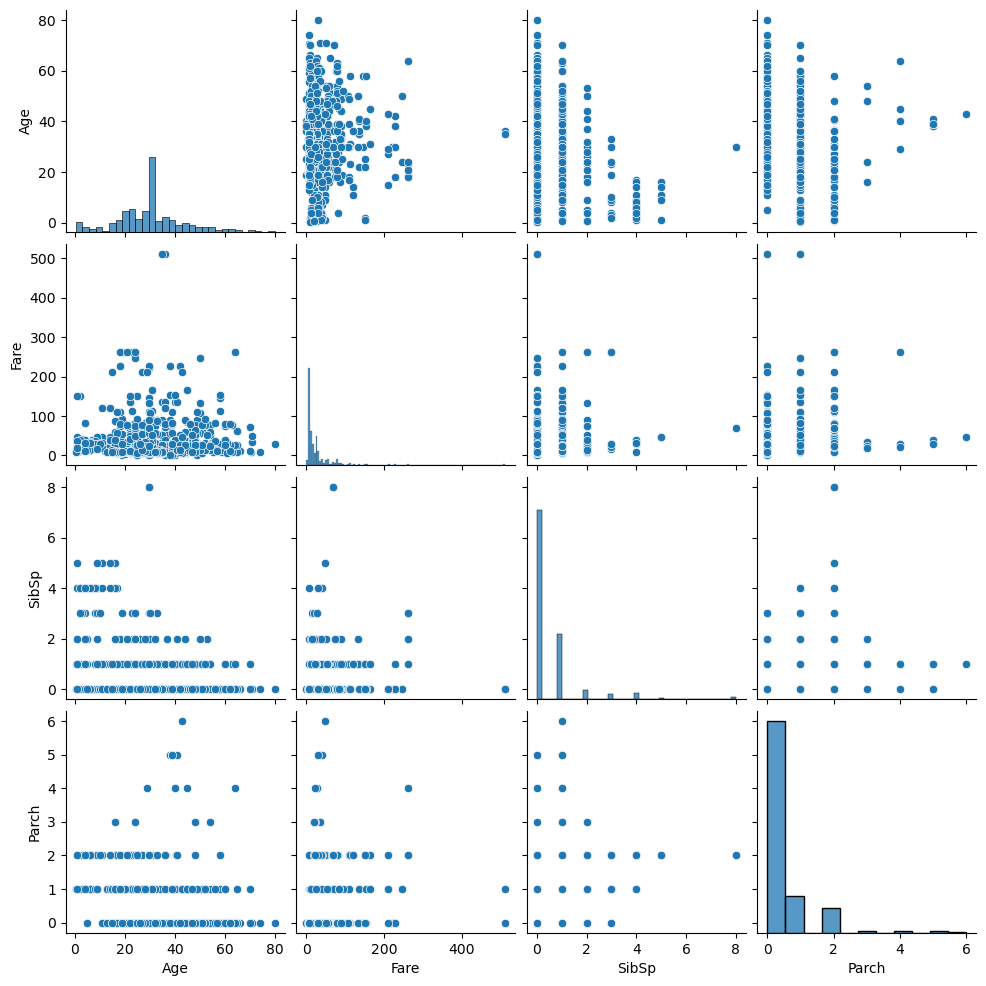

In [153]:
sns.pairplot(titanic_data[numerical_features])



## Влияние пола на выживаемость
- Постройте график распределения выживших и невыживших пассажиров по полу (используя `sns.countplot()`).
- Визуализируйте средний возраст выживших и невыживших пассажиров, разделенных по полу.


In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Распределение выживших и невыживших пассажиров по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.show()

NameError: name 'titanic_data' is not defined

<Figure size 800x600 with 0 Axes>

## Тепловая карта для выживания по возрасту и классу
- Постройте тепловую карту, показывающую процент выживших пассажиров по возрасту и классу.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


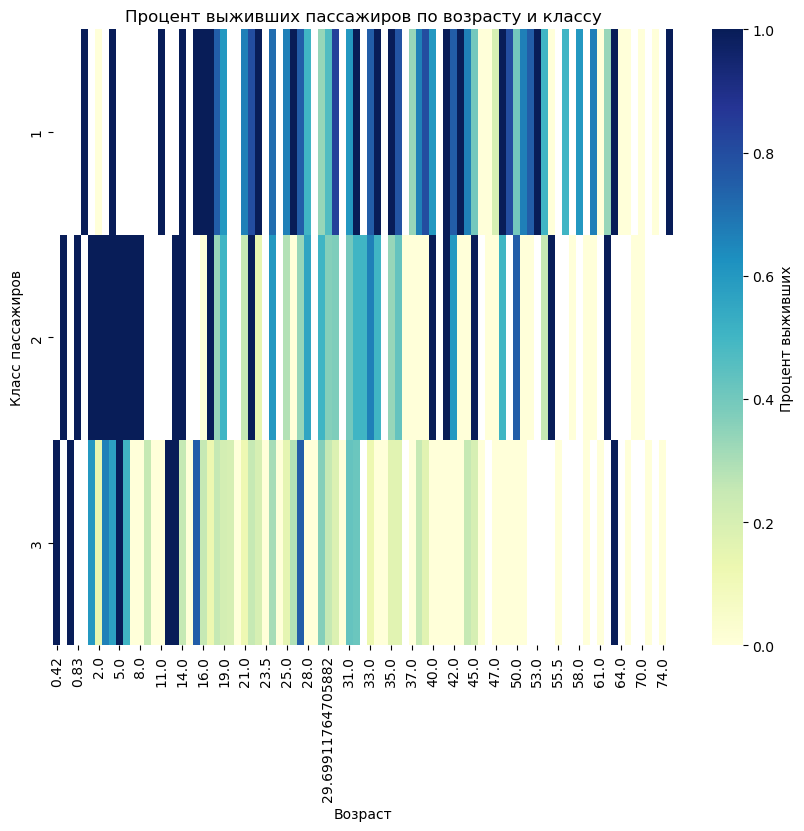

In [156]:
age_class_survival = titanic_data.groupby(['Pclass', 'Age']).Survived.mean().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(age_class_survival, cmap="YlGnBu", annot=True, fmt='.2f', cbar_kws={'label': 'Процент выживших'})
plt.title('Процент выживших пассажиров по возрасту и классу')
plt.xlabel('Возраст')
plt.ylabel('Класс пассажиров')
plt.show()

# 4. Упражнения на статистику:

## Основные статистические показатели
1. Рассчитайте среднее, медиану, моду для столбца `Age` (возраст).
2. Найдите стандартное отклонение и дисперсию для стоимости билета (`Fare`).




In [166]:
print(f"Среднее: {titanic_data['Age'].mean()}\n"
      f"Мода: {titanic_data['Age'].mode().to_numpy()}\n"
      f"Медиана: {titanic_data['Age'].median()}")

Среднее: 29.69911764705882
Мода: [29.69911765]
Медиана: 29.69911764705882


## Группировка по категориям
- Для каждого класса (`Pclass`) рассчитайте среднее и стандартное отклонение возраста пассажиров.
- Для каждого порта посадки (`Embarked`) рассчитайте среднее количество выживших пассажиров.



In [176]:
mean_age_class = titanic_data.groupby('Pclass')['Age'].agg(['mean', 'std'])

print(f"Средний возраст и стандартное отклонение пассажиров по классам: \n{mean_age_class}\n")

Средний возраст и стандартное отклонение пассажиров по классам: 
             mean        std
Pclass                      
1       37.048118  14.046369
2       29.866958  13.573825
3       26.403259  10.815245



## Гипотезы и статистические тесты
- Проверьте гипотезу о том, что средний возраст выживших пассажиров отличается от среднего возраста тех, кто не выжил. Используйте t-тест.
- Проверьте, есть ли статистически значимая разница в стоимости билетов между мужчинами и женщинами, используя t-тест.



In [11]:
pip install scipy.stats

: 

: 

: 

Будем считать H0 (нулевой гипотезой) то, что средний возраст выживших не отличается (равны) от невыживших

In [19]:
from scipy.stats import ttest_ind

In [17]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
survived_passengers = titanic_data[titanic_data['Survived'] == 1]['Age'].dropna()
not_survived_passengers = titanic_data[titanic_data['Survived'] == 0]['Age'].dropna()
t_stat, p_res = ttest_ind(survived_passengers, not_survived_passengers)

print(f"T-статистика: {t_stat}\n"
      f"P-значение: {p_res}")

T-статистика: -2.06668694625381
P-значение: 0.03912465401348249


Поскольку P-значение < 0.05 (альфа-порог), H0 - опровергается

В качестве нулевой гипотезы будем считать, что статистической разницы между стоимостями билетов для мужчин и женщин - нет

In [28]:
male_fare = titanic_data[titanic_data['Sex'] == 'male']['Fare'].dropna()
female_fare = titanic_data[titanic_data['Sex'] == 'female']['Fare'].dropna()

In [29]:
t_stat, p_res = ttest_ind(male_fare, female_fare)

print(f"T-статистика: {t_stat}\n"
      f"P-значение: {p_res}")

T-статистика: -5.529140269385719
P-значение: 4.2308678700429995e-08


Поскольку полученное P-значение намного меньше 0.05 => нулевая гипотеза опровергается. Существует значимая разница между стоимостями для мужских и женских пассажиров